<div dir="rtl">
    <h1>
        خوشه‌بندی کاربران در شبکه‌های اجتماعی
    </h1>
</div>

<div dir="rtl">
    هدف از این پروژه، جدا کردن و گروه‌بندی رئوس یک گراف همبند به صورت خوشه‌هایی است که بیشترین ارتباط را با هم دارند.
    برای مثال، ارتباط دوستی در یک شبکه‌ی اجتماعی را به صورت یال‌های بدون جهت بین کاربران در نظر بگیرید.
    می‌خواهیم کاربرانی که با هم بیشترین ارتباط را داشته و اجتماع‌های کوچک را تشکیل می‌دهند، پیدا کنیم.
    مثلا در گراف زیر، قرار است راس‌های ۱ تا ۴ در یک دسته و راس‌های ۵ تا ۹ در دسته‌ی دیگر قرار گیرند.
    </br>
    در این پروژه، ابتدا با دنبال کردن مراحل، قدم به قدم گراف زیر را خوشه‌بندی می‌کنید، سپس خودتان مراحل را روی گراف شامل ۳۵۱ فرد اجرا می‌کنید تا خوشه‌هایشان مشخص شود. 
</div>

![Graph](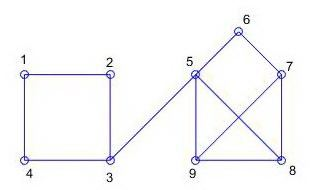
)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community import girvan_newman
from sklearn.cluster import KMeans

In [14]:
adj = np.array([
 [0,1,0,1,0,0,0,0,0],
 [1,0,1,0,0,0,0,0,0],
 [0,1,0,1,1,0,0,0,0],
 [1,0,1,0,0,0,0,0,0],
 [0,0,1,0,0,1,0,1,1],
 [0,0,0,0,1,0,1,0,0],
 [0,0,0,0,0,1,0,1,1],
 [0,0,0,0,1,0,1,0,1],
 [0,0,0,0,1,0,1,1,0]]
) # به این منظور هر درایه از ماتریس زیر شرط متصل بودن هر گره را مشخص میکند و هر درایه محل برخورد سطر و ستون است که ارتباط گره ها را مشخص میکند
"""     colume
(       1 2 3 4 5 6 7 8 9
row1 - [0,1,0,1,0,0,0,0,0],
row2 - [1,0,1,0,0,0,0,0,0],
row3 - [0,1,0,1,1,0,0,0,0],
row4 - [1,0,1,0,0,0,0,0,0],
row5 - [0,0,1,0,0,1,0,1,1],
row6 - [0,0,0,0,1,0,1,0,0],
row7 - [0,0,0,0,0,1,0,1,1],
row8 - [0,0,0,0,1,0,1,0,1],
row9 - [0,0,0,0,1,0,1,1,0],)
"""

'     colume\n(       1 2 3 4 5 6 7 8 9\nrow1 - [0,1,0,1,0,0,0,0,0],\nrow2 - [1,0,1,0,0,0,0,0,0],\nrow3 - [0,1,0,1,1,0,0,0,0],\nrow4 - [1,0,1,0,0,0,0,0,0],\nrow5 - [0,0,1,0,0,1,0,1,1],\nrow6 - [0,0,0,0,1,0,1,0,0],\nrow7 - [0,0,0,0,0,1,0,1,1],\nrow8 - [0,0,0,0,1,0,1,0,1],\nrow9 - [0,0,0,0,1,0,1,1,0],)\n'

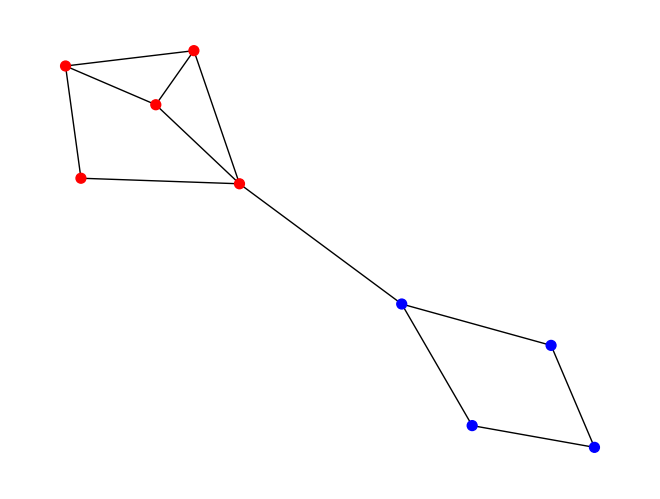

In [92]:
def show_graph(adjacency_matrix, labels=None):
    color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'yellow'}
    colors = [color_map[x] for x in labels] if labels is not None else None
        
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=50, node_color=colors)
    plt.show()

    
show_graph(adj, [0, 0, 0, 0, 2, 2, 2, 2, 2])

<div dir="rtl">
    می‌توانید از تابع show_graph برای نمایش گراف خود استفاده کنید.
    ورودی اول این تابع ماتریس مجاورت بوده و ورودی دوم آن در صورت داده شدن، باید به صورت یک لیست از اعداد ۱ تا ۴ باشد.
    بعد از خوشه‌بندی می‌توانید شماره‌ی خوشه‌ی متناظر با هر راس را در این لیست قرار دهید تا رنگ آن‌ها مشخص باشند.
</div>

<div dir="rtl">
    <h2>
        گراف تمرینی
    </h2>
</div>

<div dir="rtl">
    ابتدا ماتریس مجاورت گراف را به شکل یک ماتریس در numpy تعریف کنید.
    در این ماتریس، اگر بین دو راس i و j یال وجود داشته باشد،
    درایه‌ی i,j یک خواهد بود.
    بنابراین به دلیل بدون جهت بودن گراف، ماتریس متقارن خواهد بود.
</div>

In [16]:
dataTXTfile = open("data.txt" ,'r')

edges = []
while True:
    eachLine = dataTXTfile.readline()
    if not eachLine:
        break
    handle_List = []
    for init in eachLine.replace("\n","").replace(" ","").split("\t"):
        handle_List.append(int(init))
        
    edges.append(handle_List)
        
dataTXTfile.close()


dataSet = np.array(edges)
biggetNodeOfGraph = dataSet.max() + 1

adj_matrix = np.zeros((biggetNodeOfGraph ,biggetNodeOfGraph))
adj_matrix[dataSet[:,0], dataSet[:,1]] = 1

adj_matrix_final = []
for elemnt in adj_matrix:
    arrayu = np.delete(elemnt ,[0])
    adj_matrix_final.append(arrayu)

adj_matrix_final.remove(adj_matrix_final[0])


netp = np.array(adj_matrix_final) # final output this section ✅

NODE = 18
netp[NODE - 1] # if want see node of 18 graph just use (NODE - 1) -> (18 - 1) = 17 then netp[17] show:

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.])

<div dir="rtl">
    در این مرحله، ابتدا جمع سطرها را محاسبه کرده و در بردار Sum ذخیره کنید.
    سپس ماتریس لاپلاسین را به صورت
    $
    Lapl = diag(Sum) - Adj
    $
    محاسبه کنید.
    منظور از
    $diag(x)$
    ماتریس قطری‌ای است که درایه‌های
    $x$
    روی قطر اصلی آن قرار گرفته و بقیه‌ی درایه‌های آن صفر هستند.
    هدف از محاسبه‌ی این ماتریس این است که با حفظ ویژگی‌های ماتریس مجاورت، جمع سطرها و ستون‌های آن نیز صفر شوند.
</div>

In [17]:
totalSum = []
for initial in netp:
    sum = 0
    for init in initial:
        sum = sum + init
    totalSum.append(sum)
#      degree matrix     -  Adj
lapl = np.diag(totalSum) - netp
lapl # final output this section ✅ for data.txt

totalSum = []
for initial in adj:
    sum = 0
    for init in initial:
        sum = sum + init
    totalSum.append(sum)
#             degree matrix     -  Adj
lapl_sample = np.diag(totalSum) - adj # final output this section ✅ for Practice graph (sample graph)

<div dir="rtl">
    حال باید مقدار ویژه و بردار ویژه‌های ماتریس را استخراج کنید.
    همچنین باید این مقادیر ویژه و بردار ویژه‌های متناظرشان، از کوچک به بزرگ مرتب شده باشند.
</div>

In [28]:
eiganvalues ,eiganvectors = np.linalg.eig(lapl) # خروجی شامل آرایه‌ای از مقادیر ویژه و یک ماتریس از بردارهای ویژه است. for 351 person data.txt
eiganvalues_sample ,eiganvectors_sample = np.linalg.eig(lapl_sample)  
# خروجی شامل آرایه‌ای از مقادیر ویژه و یک ماتریس از بردارهای ویژه است. for sample graph برای گراف تمرینی

eigan_values = np.sort(eiganvalues) # for data.txt
eigan_vectors = np.sort(eiganvectors)

eigan_values_sample = np.sort(eiganvalues_sample) # for Practice graph (sample graph)
eigan_vectors_sample = np.sort(eiganvectors_sample)

print(eigan_values_sample)
print("------")
print(eigan_vectors_sample)

[-3.88578059e-16  2.80309588e-01  2.00000000e+00  2.00000000e+00
  2.28442262e+00  3.43361574e+00  4.00000000e+00  4.33127361e+00
  5.67037844e+00]
------
[[-4.55542030e-01 -3.65964452e-01 -3.33333333e-01 -3.26817287e-01
  -6.13836195e-02 -3.23631740e-16 -6.97267498e-17  3.52472396e-31
   6.60956034e-01]
 [-3.91695631e-01 -3.33333333e-01 -9.39954220e-02 -2.94152627e-16
   1.12650557e-01  2.47512086e-01  2.62326200e-01  3.80950258e-01
   6.98269935e-01]
 [-6.34221610e-01 -5.61281995e-01 -3.52086557e-01 -3.33333333e-01
  -2.18053191e-01 -1.01105183e-02 -4.01906970e-17  4.83102403e-31
   1.35375963e-17]
 [-6.98269935e-01 -3.91695631e-01 -3.33333333e-01 -2.47512086e-01
  -9.39954220e-02  2.94152627e-16  1.12650557e-01  2.62326200e-01
   3.80950258e-01]
 [-5.20268321e-01 -3.33333333e-01 -2.65843797e-01 -1.46806087e-02
   4.51080009e-31  1.42155986e-17  9.49916474e-17  1.90354090e-01
   7.14903237e-01]
 [-3.33333333e-01 -2.80690800e-01 -1.28680989e-01 -9.48537559e-02
   1.26921735e-16  5.938

<div dir="rtl">
    چون جمع سطرهای ماتریس لاپلاسین صفر بود، ماتریس تکین بوده و یک مقدار ویژه‌ی صفر خواهد داشت.
    همچنین ماتریس مثبت نیمه معین است و همه‌ی مقادیر ویژه نامنفی هستند.
    بنابراین کوچک‌ترین مقدار ویژه صفر بوده و مقدار ويژه‌ی بعدی مثبت خواهد بود.
    بردار ویژه‌ی متناظر با این مقدار ویژه را در نظر بگیرید.
    این بردار ویژه متناظر با کمترین واریانس است.
    (برای اطلاعات بیشتر در مورد PCA مطالعه کنید.)
    بنابراین مناسب‌ترین معیار برای خوشه‌بندی است.
    </br>
    راس‌هایی که درایه‌ی متناظرشان در این بردار ویژه مثبت است را در یک خوشه و راس‌هایی که منفی است را در خوشه‌ی دیگر در نظر بگیرید.
    با بررسی خروجی می‌توانید تبدیل شدن گراف اولیه به دو خوشه‌ی گفته شده در ابتدای پروژه را مشاهده کنید.
</div>

In [159]:
eigenvalues, eigenvectors = np.linalg.eigh(lapl_sample)
fiedler_vector = eigenvectors[: ,1]
print(fiedler_vector)

lebals = []
cluster_1 = np.where(fiedler_vector > 0)[0]
cluster_2 = np.where(fiedler_vector <= 0)[0]

for inity in cluster_1:
    lebals.append(0)

for inity in cluster_2:
    lebals.append(1)

print(lebals) # 2 cluster

[ 0.45554203  0.39169563  0.21805319  0.39169563 -0.19035409 -0.30870383
 -0.34052092 -0.30870383 -0.30870383]
[0, 0, 0, 0, 1, 1, 1, 1, 1]


<div dir="rtl">
    گراف را با خوشه‌هایی که بدست آوردید توسط تابع show_graph نمایش دهید.
</div>

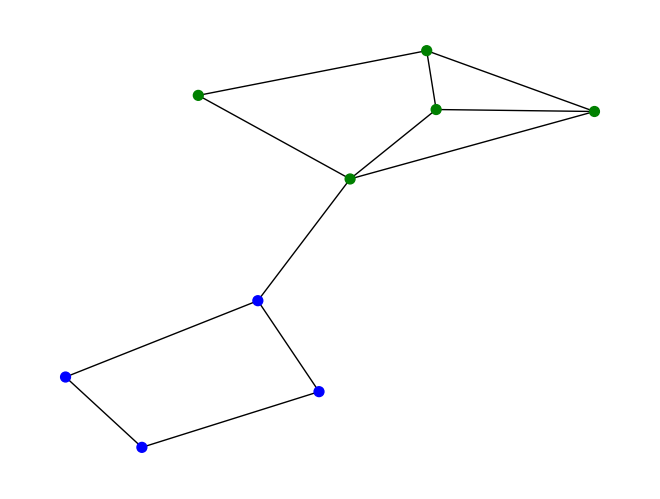

In [160]:
show_graph(adj ,lebals)

<div dir="rtl">
    برای داشتن تعداد بیشتری خوشه، می‌توان بردار ویژه‌های بیشتری در نظر گرفت.
    برای مثال، برای داشتن ۴ خوشه می‌توانید بردار ویژه‌ی متناظر با ۲ کوچک‌ترین مقدار ویژه‌های مثبت را در نظر بگیرید.
    حال به ازای هر راس، دو درایه در این دو بردار ویژه داریم.
    می‌توانید ۴ خوشه را به صورت زیر در نظر بگیرید:
    <ul>
        <li>$(+,+)$</li>
        <li>$(+,-)$</li>
        <li>$(-,+)$</li>
        <li>$(-,-)$</li>
    </ul>
    با انجام این خوشه‌بندی روی گراف اولیه، می‌توانید مشاهده کنید خوشه‌بندی مناسب نبوده و همان دو خوشه‌ی اولیه دقیق‌تر بودند.
</div>

In [161]:
lebals = []

fiedler_vector_0 = eigenvectors[: ,2]
fiedler_vector_1 = eigenvectors[: ,1]
print(fiedler_vector_1)
print(fiedler_vector_0)

for inity in range(0 ,9):
    if (fiedler_vector_0[inity] < 0) and (fiedler_vector_1[inity] > 0):
        lebals.append(1)
    elif (fiedler_vector_0[inity] > 0) and (fiedler_vector_1[inity] < 0):
        lebals.append(0)
    elif (fiedler_vector_0[inity] < 0) and (fiedler_vector_1[inity] < 0):
        lebals.append(2)
    else:
        lebals.append(1)

[ 0.45554203  0.39169563  0.21805319  0.39169563 -0.19035409 -0.30870383
 -0.34052092 -0.30870383 -0.30870383]
[ 7.11122642e-17 -2.08957177e-01  1.37227571e-17  2.08957177e-01
  0.00000000e+00  7.80031536e-01  2.22044605e-16 -3.90015768e-01
 -3.90015768e-01]
[1, 1, 1, 1, 1, 0, 0, 2, 2]


<div dir="rtl">
    گراف را با خوشه‌هایی که بدست آوردید توسط تابع show_graph نمایش دهید.
</div>

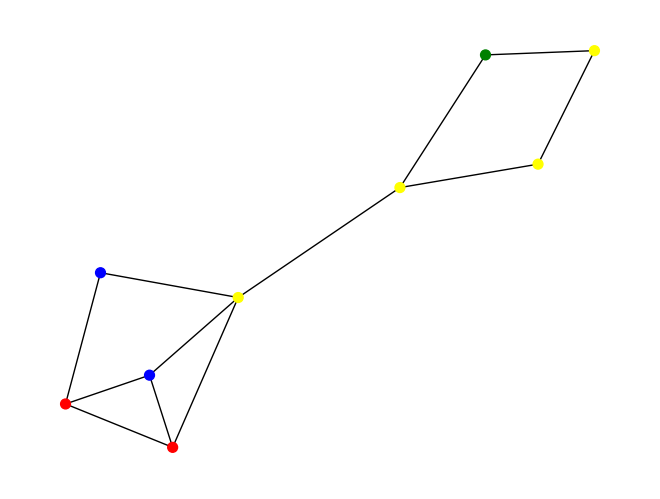

clusters: [3, 1, 3, 3, 3, 0, 0, 2, 2]
با 3 خوشه


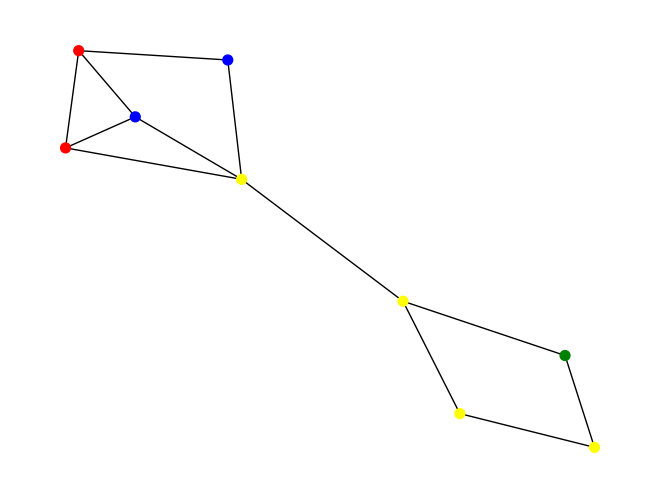

clusters: [3, 1, 3, 3, 3, 0, 0, 2, 2]
با 4 خوشه


In [165]:
show_graph(adj ,lebals)
print("clusters: " + str(lebals)) # 3 cluster
lebals = []
print("با 3 خوشه")
for inity in range(0 ,9):
    if (fiedler_vector_0[inity] < 0) and (fiedler_vector_1[inity] > 0):
        lebals.append(1)
    elif (fiedler_vector_0[inity] > 0) and (fiedler_vector_1[inity] < 0):
        lebals.append(0)
    elif (fiedler_vector_0[inity] < 0) and (fiedler_vector_1[inity] < 0):
        lebals.append(2)
    else:
        lebals.append(3)

show_graph(adj ,lebals)
print("clusters: " + str(lebals)) # 4 cluster
print("با 4 خوشه")

<div dir="rtl">
    <h2>
        گراف اصلی
    </h2>
</div>

<div dir="rtl">
    اگر چه در گراف تمرینی خوشه‌بندی با چشم هم قابل مشاهده بود، در گراف با رئوس بیشتر این کار به صورت چشمی ممکن نیست.
    در این قسمت، مراحل بالا را روی گراف اصلی اجرا کنید و خوشه‌بندی با ۲ و ۴ خوشه را بدست آورید.
</div>

In [166]:
adj_final = np.zeros((100, 100))
file1 = open('data.txt', 'r')
lines = file1.readlines()
for l in lines:
    i, j = l.split()
    adj_final[int(i) - 1, int(j) - 1] = 1
    adj_final[int(j) - 1, int(i) - 1] = 1

print(adj_final[90])
print(netp[90]) # my way (my algorithm ;) )

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0.]


In [167]:
eigenvalues, eigenvectors = np.linalg.eigh(adj_final)
fiedler_vector = eigenvectors[: ,1]
lebals = []
cluster_1 = np.where(fiedler_vector > 0)[0]
cluster_2 = np.where(fiedler_vector <= 0)[0]

for inity in cluster_1:
    lebals.append(0)

for inity in cluster_2:
    lebals.append(1)

print(lebals)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


<div dir="rtl">
    گراف‌هایی که با ۲ و ۴ خوشه، خوشه‌بندی کردید را توسط تابع show_graph نمایش دهید.
</div>

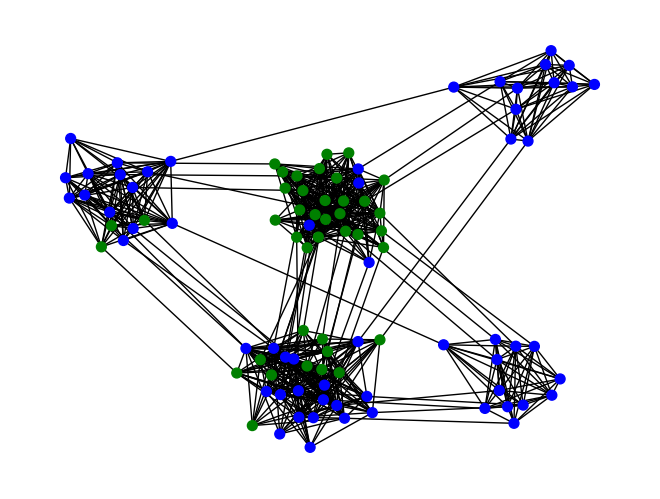

clusters: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
با 2 خوشه


In [168]:
show_graph(netp ,lebals)
print("clusters: " + str(lebals)) # 4 cluster
print("با 2 خوشه")

<div dir="rtl">
    <h2>
        توضیحات خوشه بندی - الگوریتمی که برای خوشه بندی استفاده کردم
    </h2>
</div>

<div dir="rtl">
    برای خوشه بندی طبق گفته سوال ابتدا گره هایی که بردار ویژه های متناظرشان منفی بودن را در یک خوشه و مثبت ها را در خوشه دیگه قرار دادم ( خوشه بندی به تعداد 2 )
    برای این کار از ماتریس <b>eigenvectors</b> .
    <p></p>
    استفاده کردم همانطور که میدونید هر ستون از این ماتریس یک بردار ویژه هستش پس برای خوشه بندی 2 تایی صرفا یک ستون از این ماتریس کافیه
    برای خوشه بندی دو تایی من از ستون دوم که میشه بردار ویژه دوم استفاده کردم که در کدبیس <b>fiedler_vector = eigenvectors[:, 1]</b> هستش و سپس شرط عناصری که از 0 کوچک تر هستند را 
    قرار دادم و آنهایی که کوچک تر بودن در یک آرایه و شرط بزرگ تر بودن را در آرایه دیگر و درنهایت بزرگ تر ها لیبل 1 و کوچک تر ها لیبل 0 را دریافت کردن
    و <b>درنهایت برای خوشه بندی بیشتر از 2 خوشه کافی بود یک بردار ویژه دیگر به غیر از بردار ویژه دوم را انتخاب کنم و جفت بردار های ویژه را باهم مقایسه کنم و درنهایت زوج های مرتبی که ایجاد میشدن شرط های من را به 4 تا تبدیل میکردن </b>که به ترتیب لیبل های 0 تا 3 را بهشون اختصاص میدادم    
</div>

[ 5.40959430e-03  2.50457834e-03  1.29123453e-04  6.65184890e-03
  1.04108115e-03  2.11937294e-03  3.02779097e-02  4.34318004e-02
 -1.47547217e-02  3.36780483e-03  1.29869912e-02 -1.37438377e-03
  5.82914037e-03  1.23755593e-02 -1.91110928e-01  3.36780483e-03
 -1.07214969e-03  4.09868499e-02  8.15436115e-03  1.85185056e-02
 -1.77744202e-02  8.92366461e-02 -7.79597910e-02 -1.37438377e-03
  3.08151177e-03  2.78211601e-03 -1.77813231e-02 -5.61805791e-03
  2.93591590e-03 -1.64072229e-01 -1.06936888e-02  1.33497099e-01
 -2.03700987e-01 -8.20240631e-03  1.02168560e-01 -4.33871465e-02
 -9.34804408e-03  2.80580851e-03  7.31927858e-02 -1.17094224e-02
 -1.11802021e-02  5.18721459e-02 -2.08884852e-01  2.88890085e-02
  1.59014652e-02 -2.30424306e-02 -2.20451554e-01 -1.53503398e-02
  1.60447194e-02  7.54655159e-02  2.29343633e-02  1.21027460e-01
  7.97243582e-02  3.53443715e-02  3.82052059e-02 -1.41502394e-02
  4.15345990e-02 -1.35136628e-02  2.97407672e-02  5.76265202e-02
 -3.16928636e-01  1.83141

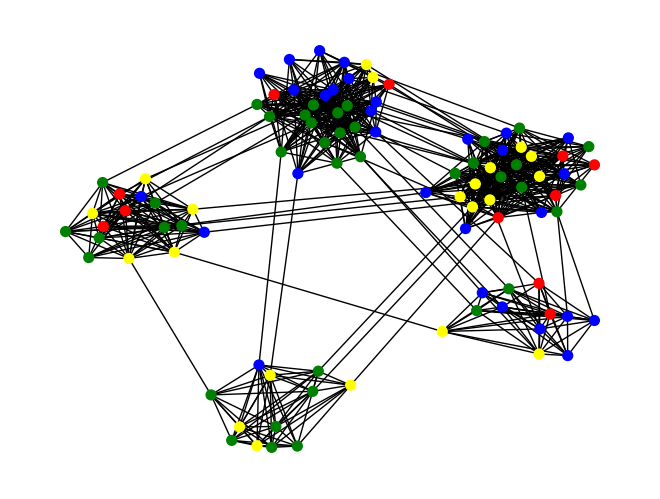

clusters: [1, 3, 1, 1, 3, 1, 3, 1, 0, 3, 1, 2, 1, 1, 0, 3, 2, 1, 3, 1, 2, 3, 0, 2, 1, 3, 0, 0, 3, 2, 0, 1, 0, 0, 1, 0, 0, 3, 1, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 3, 1, 0, 3, 0, 3, 1, 2, 3, 3, 1, 1, 0, 1, 0, 2, 3, 1, 0, 1, 0, 3, 3, 2, 3, 3, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 3, 1, 0, 1, 1, 0, 1]
با 4 خوشه


In [176]:
eigenvalues, eigenvectors = np.linalg.eigh(adj_final)
lebals = []

fiedler_vector_0 = eigenvectors[: ,2] # بردار ویژه سوم
fiedler_vector_1 = eigenvectors[: ,1] # بردار ویژه دوم
print(fiedler_vector_1)


for inity in range(0 ,100):
    if (fiedler_vector_0[inity] < 0) and (fiedler_vector_1[inity] > 0):
        lebals.append(1)
    elif (fiedler_vector_0[inity] > 0) and (fiedler_vector_1[inity] < 0):
        lebals.append(0)
    elif (fiedler_vector_0[inity] < 0) and (fiedler_vector_1[inity] < 0):
        lebals.append(2)
    else:
        lebals.append(3)
    
show_graph(netp ,lebals)
print("clusters: " + str(lebals)) # 4 cluster
print("با 4 خوشه")